# Datasets

In [4]:
!pip install --upgrade datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.0/468.0 kB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.5
    Uninstalling 

In [1]:
from datasets import load_dataset

ds = load_dataset("Salesforce/wikitext", "wikitext-103-v1")

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/722k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/655k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [10]:
train_text = "".join(ds['validation']['text'])

In [11]:
with open('./datasets/wikitext_val.txt', 'w') as f:
    f.write(train_text)

# Pretraining Data Encoding

In [1]:
#!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Assuming your notebook's working directory is set such that ../llm-tokenizer is reachable:
tokenizer_dir = os.path.abspath(os.path.join(os.getcwd(), '../llm_tokenizer'))
if tokenizer_dir not in sys.path:
    sys.path.insert(0, tokenizer_dir)

import BPETokenizer  # Now you should be able to import it

In [2]:
import torch
import torch.nn.functional as F

device = 'cuda' if torch.cuda.is_available else 'cpu'

if torch.cuda.is_available():
    current_device = torch.cuda.current_device()
    device_name = torch.cuda.get_device_name(current_device)
    device_props = torch.cuda.get_device_properties(current_device)
    memory_summary = torch.cuda.memory_summary(device=current_device, abbreviated=True)
    
    print("Current device index:", current_device)
    print("Running on GPU:", device_name)
    print("GPU properties:")
    print("  - Compute Capability:", f"{device_props.major}.{device_props.minor}")
    print("  - Total Memory:", f"{device_props.total_memory / (1024**3):.2f} GB")
    print("  - Multiprocessor Count:", device_props.multi_processor_count)
    print("  - Max Threads per Multiprocessor:", device_props.max_threads_per_multi_processor)
else:
    print("CUDA is not available, running on CPU.")

Current device index: 0
Running on GPU: NVIDIA RTX A6000
GPU properties:
  - Compute Capability: 8.6
  - Total Memory: 47.54 GB
  - Multiprocessor Count: 84
  - Max Threads per Multiprocessor: 1536


In [1]:
!nvidia-smi

Tue Mar  4 05:27:56 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    Off  | 00000000:00:05.0 Off |                  Off |
| 30%   32C    P8    22W / 300W |      1MiB / 49140MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A6000    Off  | 00000000:00:06.0 Off |                  Off |
| 30%   

In [25]:
from GPT import GPT, GPTConfig

config = GPTConfig
config.batch_size = 8
config.block_size = 1024
config.epochs = 10000
config.validation_frequency = 20
config.validation_epochs = 1
config.dataset = "wikitext2"
config.tokenizer_name = "wikitext2"

In [26]:
from dataloader import DataLoader

In [27]:
data_loader = DataLoader(config)
# data_loader.next_batch()

[DataLoader.__init__] loaded tokenizer tokenizer_wikitext2.pickle
[DataLoader._load_dataset] ./datasets/wikitext2_train.txt: size = 13320762
[DataLoader._load_dataset] ./datasets/wikitext2_train.txt: max vocabulary size=659, compression ratio=0.4992019976034404
[DataLoader._load_dataset] ./datasets/wikitext2_val.txt: size = 1138080
[DataLoader._load_dataset] ./datasets/wikitext2_val.txt: max vocabulary size=659, compression ratio=0.4990940882890482
[DataLoader.__init__] train_data.shape=torch.Size([6649751]), val_data.shape=torch.Size([568009])


In [28]:
x, y = data_loader.next_batch()
x1, y = data_loader.next_batch()
assert x[0][0] != x1[0][0]
x.shape, y.shape

(torch.Size([8, 1024]), torch.Size([8, 1024]))

In [29]:
x, y = data_loader.next_batch(mode="eval")
x1, y = data_loader.next_batch(mode="eval")
assert x[0][0] != x1[0][0]
x.shape, y.shape

(torch.Size([8, 1024]), torch.Size([8, 1024]))

# Training

In [13]:
import torch
import gc




#del X_tr
#del y_tr

l = locals().items()
for name, obj in l:
    try:
        if isinstance(obj, torch.Tensor) and obj.is_cuda:
            print(f"{name}: shape={obj.shape}, device={obj.device}")
    except Exception as e:
        pass
    


train_loss: shape=torch.Size([]), device=cuda:0


In [14]:
gc.collect()
torch.cuda.empty_cache()

In [30]:
model = GPT(config)
model.to(device)
print(sum(p.numel() for p in model.parameters()))

163037184


In [18]:
!nvidia-smi

Fri Feb 21 08:55:37 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    Off  | 00000000:00:05.0 Off |                  Off |
| 30%   54C    P2    77W / 300W |   1509MiB / 49140MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
model

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(64, 768)
    (h): ModuleList(
      (0-11): 12 x TransformerBlock(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): MultiHeadedMaskedSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          (activation): GELU(approximate='tanh')
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [40]:
torch.where(model.transformer.wte.weight.grad.mean(1) > 0)

(tensor([ 32,  49,  55,  66,  67,  68,  69,  71,  72,  75,  76,  78,  79,  81,
          84,  89,  98, 104, 105, 112, 116, 119, 121, 122, 130, 148, 164, 257,
         260, 261, 262, 263, 264, 270, 275, 277, 278, 281, 286, 287, 288, 293,
         295, 296, 297, 298, 300, 309, 310, 312, 313, 318, 323, 333, 334, 335,
         338, 340, 353, 354, 355, 357, 358, 362, 363, 368, 370, 375, 376, 378,
         380, 383, 384, 390, 391, 392, 395, 396, 397, 408, 412, 414, 415, 416,
         417, 419, 420, 424, 427, 431, 433, 434, 436, 443, 444, 445, 453, 458,
         461, 464, 466, 470, 472, 480, 482, 484, 487, 492, 497, 498, 499, 501,
         503, 505, 511, 513, 516, 517, 522, 523, 525, 530, 532, 534, 537, 541,
         545, 552, 555, 556, 558, 561, 567, 568, 573, 574, 578, 579, 584, 590,
         591, 593, 594, 601, 605, 607, 608, 612, 614, 615, 621, 623, 628, 629,
         632, 634, 637, 644, 651, 654, 656, 658], device='cuda:0'),)

In [34]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005)
# train_losses, val_losses = [], []
bb = config.batch_size * config.block_size

for epoch in range(config.epochs):
    optimizer.zero_grad()
    X, y = data_loader.next_batch(device=device)
    logits = model(X)
    train_loss = F.cross_entropy(logits.view(bb, -1), y.view(bb))
    #train_losses.append(train_loss.item())
    train_loss.backward()
    optimizer.step()
    
    print(train_loss)
    
    del X, y, logits
    gc.collect()
    torch.cuda.empty_cache()
    
    if epoch % config.validation_frequency == 0:
        model.eval()
        with torch.no_grad():
            epoch_val_losses = []
            for _ in range(config.validation_epochs):
                X, y = data_loader.next_batch(mode="eval", device=device)
                logits = model(X)
                val_loss = F.cross_entropy(logits.view(bb, -1), y.view(bb))
                epoch_val_losses.append(val_loss)
                
                del X, y, logits
                gc.collect()
                torch.cuda.empty_cache()
                
            val_loss = sum(epoch_val_losses) / len(epoch_val_losses)
            model.train()
    
    
  
            #val_losses.append(val_loss)
            print(f"[{epoch}/{config.epochs}] train_loss={train_loss.item():.2f}, val_loss={val_loss:.2f}")
    break

# [880/10000] train_loss=3.59, val_loss=4.00

tensor(9.9828, device='cuda:0', grad_fn=<NllLossBackward0>)
[0/10000] train_loss=9.98, val_loss=9.69


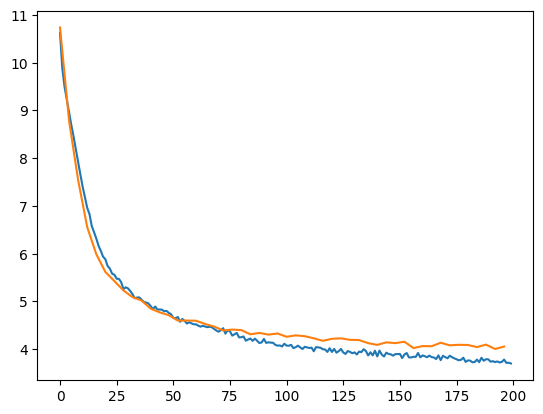

In [38]:
from matplotlib import pyplot as plt
gap = 4
plot_size = gap * len(val_losses)
val_losses = [t.cpu() for t in val_losses]
clip = (len(train_losses) // plot_size) * plot_size

plt.plot(torch.tensor(train_losses[:clip]).view(plot_size, - 1).mean(1))
plt.plot([i * gap for i, _ in enumerate(val_losses)], val_losses)
plt.show()

# Generation

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import torch
import torch.nn.functional as F

device = 'cuda' if torch.cuda.is_available else 'cpu'

if torch.cuda.is_available():
    current_device = torch.cuda.current_device()
    device_name = torch.cuda.get_device_name(current_device)
    device_props = torch.cuda.get_device_properties(current_device)
    memory_summary = torch.cuda.memory_summary(device=current_device, abbreviated=True)
    
    print("Current device index:", current_device)
    print("Running on GPU:", device_name)
    print("GPU properties:")
    print("  - Compute Capability:", f"{device_props.major}.{device_props.minor}")
    print("  - Total Memory:", f"{device_props.total_memory / (1024**3):.2f} GB")
    print("  - Multiprocessor Count:", device_props.multi_processor_count)
    print("  - Max Threads per Multiprocessor:", device_props.max_threads_per_multi_processor)
else:
    print("CUDA is not available, running on CPU.")

Current device index: 0
Running on GPU: NVIDIA RTX A6000
GPU properties:
  - Compute Capability: 8.6
  - Total Memory: 47.54 GB
  - Multiprocessor Count: 84
  - Max Threads per Multiprocessor: 1536


In [3]:
from GPT import GPT, GPTConfig
from dataloader import DataLoader

config = GPTConfig()
config.batch_size = 28
config.block_size = 1024
config.epochs = 1000000
config.validation_frequency = 100
config.validation_epochs = 5
config.dataset = "wikitext"
config.tokenizer_name = "wikitext2_18k"

In [4]:
data_loader = DataLoader(config)
config.vocab_size = data_loader.vocab_size

[Tokenizer.__init__] 0 regex tokens (order preserved)
[DataLoader.__init__] loaded tokenizer tokenizer_wikitext2_18k.pickle
[DataLoader._load_dataset] Loading cached encoding from ./datasets/wikitext_train.txt.cache.pt
[DataLoader._load_dataset] ./datasets/wikitext_train.txt: vocab_size = 17707
[DataLoader._load_dataset] Loading cached encoding from ./datasets/wikitext_val.txt.cache.pt
[DataLoader._load_dataset] ./datasets/wikitext_val.txt: vocab_size = 17707
[DataLoader.__init__] train_data.shape=torch.Size([208821909]), val_data.shape=torch.Size([431117])


In [5]:
model = GPT(config)
model.to(device)
print(f"{sum(p.numel() for p in model.parameters()):,}")

99,441,408


In [6]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005)

In [7]:
%load_ext autoreload
%autoreload 2


from utils import load_checkpoint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current device index: 0
Running on GPU: NVIDIA RTX A6000
GPU properties:
  - Compute Capability: 8.6
  - Total Memory: 47.54 GB
  - Multiprocessor Count: 84
  - Max Threads per Multiprocessor: 1536


In [8]:
import os
os.listdir('./checkpoints')

['checkpoint_epoch_40000_GPT_vocab18k.pth',
 '__init__.py',
 'checkpoint_epoch_5000_GPT.pth',
 'checkpoint_epoch_5000_GPT_vocab18k.pth',
 'checkpoint_epoch_1000_GPT.pth',
 'checkpoint_epoch_1000_GPT_vocab18k.pth']

In [9]:
checkpoint_path = "./checkpoints/checkpoint_epoch_40000_GPT_vocab18k.pth"

In [10]:
checkpoint = torch.load(checkpoint_path)
checkpoint['model_state_dict'].keys()
print("")

In [11]:
load_checkpoint(model, None, checkpoint_path, None)

Checkpoint loaded from ./checkpoints/checkpoint_epoch_40000_GPT_vocab18k.pth, resuming at epoch 40000


(40000, 'GPT_vocab18k')

In [12]:
tokenizer = data_loader.tokenizer

In [40]:
prompt = """When the rest of us went on the """
tokens = tokenizer.encode(prompt)
tokens
model.eval()
x = torch.tensor(tokens[:config.block_size], device=device).view(1, -1)
x
    

tensor([[  87, 1286,  260,  357,  400,  280,  487,  115, 1966,  268,  110,  260,
           32]], device='cuda:0')

In [41]:
to_decode = x.tolist()[0]
for _ in range(50):
    
    x = x[-config.block_size:]

    logits = model(x.view(1, -1))
    
    new_token = torch.multinomial(F.softmax(logits[0, -1, :], dim=0),  1)
    v, ixs = logits[0, -1, :].topk(50)
    ix = torch.multinomial(F.softmax(v, dim=0), 1)
    new_token = ixs[ix]
    to_decode.append(new_token.view(-1).item())
    x = torch.cat([x.view(-1), new_token])

print(tokenizer.decode(to_decode, raw_tokens=False))

When the rest of us went on the Štösar chart at 1 pm , on 13 August . 
 The two which were still driven by the order of battle were Nieupas ( Aka


In [180]:
prompt = "First Citizen:"
tokens = tokenizer.encode(prompt, raw_tokens=False)
tokenizer.decode(tokens, raw_tokens=False)

'First Citizen:'

# Evaluation

In [81]:
!pip install --upgrade datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.0/468.0 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.5
    Uninstalling 

In [82]:
import datasets

[autoreload of huggingface_hub failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 309, in update_function
    setattr(old, name, getattr(new, name))
ValueError: __dir__() requires a code object with 1 free vars, not 0
]
/usr/lib/python3.11/importlib/__init__.py:169: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  _bootstrap._exec(spec, module)
[autoreload of huggingface_hub.utils._headers failed: 

In [201]:
X_val.shape, y_val.shape

(torch.Size([24737, 64]), torch.Size([24737, 64]))

In [215]:
samples = 20
y_pred = model(X_val[:samples])
y_pred = torch.argmax(F.softmax(y_pred, dim=2), dim=2)
y_val = y_val[:samples]
val, counts = torch.unique((y_pred == y_val).view(-1), return_counts=True)
assert val[1] == True
print(f"({samples * config.batch_size} samples) precision={counts[1] / (counts[0] + counts[1]).item():.3f}%")

(640 samples) precision=0.226%


In [ ]:
# (640 samples) precision=0.226%